In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messages from tensorflow, but we will receive error messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [3]:

# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


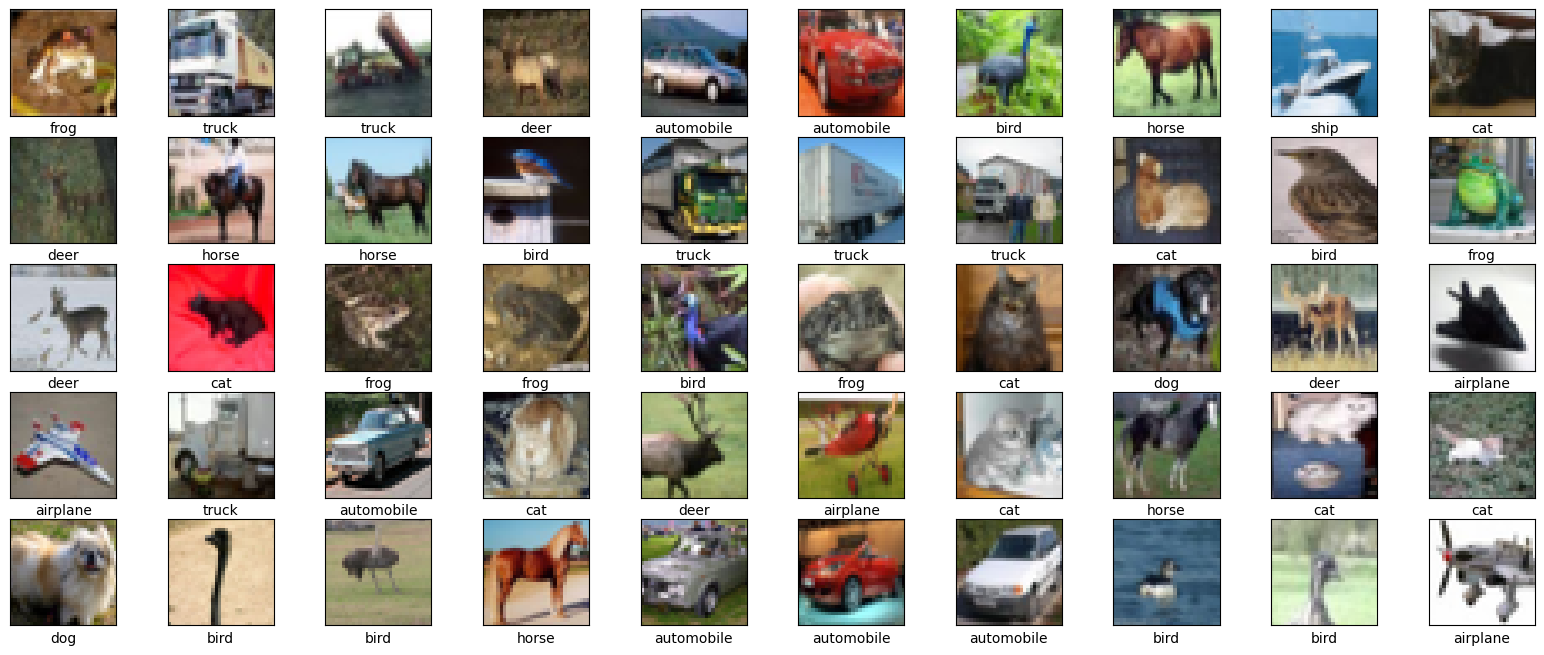

In [5]:
# Displaying some sample images from the dataset
plt.figure(figsize=(20, 8))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [6]:

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [10]:
# Defining a function to create and compile the model
def create_model(optimizer, loss):
    model = keras.Sequential([
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

# Training the model with SGD optimizer and Categorical Cross-Entropy loss
model_sgd_categorical = create_model(optimizer='sgd', loss='categorical_crossentropy')
history_sgd_categorical = model_sgd_categorical.fit(X_train, tf.keras.utils.to_categorical(Y_train),
                                                    epochs=10, validation_split=0.2)

# Training the model with SGD optimizer and Sparse Categorical Cross-Entropy loss
model_sgd_sparse_categorical = create_model(optimizer='sgd', loss='sparse_categorical_crossentropy')
history_sgd_sparse_categorical = model_sgd_sparse_categorical.fit(X_train, Y_train,
                                                                  epochs=10, validation_split=0.2)

# Training the model with Adam optimizer and Categorical Cross-Entropy loss
model_adam_categorical = create_model(optimizer='adam', loss='categorical_crossentropy')
history_adam_categorical = model_adam_categorical.fit(X_train, tf.keras.utils.to_categorical(Y_train),
                                                      epochs=10, validation_split=0.2)

# Training the model with Adam optimizer and Sparse Categorical Cross-Entropy loss
model_adam_sparse_categorical = create_model(optimizer='adam', loss='sparse_categorical_crossentropy')
history_adam_sparse_categorical = model_adam_sparse_categorical.fit(X_train, Y_train,
                                                                    epochs=10, validation_split=0.2)

# Training the model with RMSprop optimizer and Categorical Cross-Entropy loss
model_rmsprop_categorical = create_model(optimizer='rmsprop', loss='categorical_crossentropy')
history_rmsprop_categorical = model_rmsprop_categorical.fit(X_train, tf.keras.utils.to_categorical(Y_train),
                                                            epochs=10, validation_split=0.2)

# Training the model with RMSprop optimizer and Sparse Categorical Cross-Entropy loss
model_rmsprop_sparse_categorical = create_model(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
history_rmsprop_sparse_categorical = model_rmsprop_sparse_categorical.fit(X_train, Y_train,
                                                                          epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 72s 57ms/step - loss: 2.0944 - accuracy: 0.2283 - val_loss: 1.8927 - val_accuracy: 0.3129
Epoch 2/10
1250/1250 [==============================] - 70s 56ms/step - loss: 1.7425 - accuracy: 0.3689 - val_loss: 1.6101 - val_accuracy: 0.4107
Epoch 3/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.5516 - accuracy: 0.4390 - val_loss: 1.4869 - val_accuracy: 0.4659
Epoch 4/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.4466 - accuracy: 0.4789 - val_loss: 1.4361 - val_accuracy: 0.4801
Epoch 5/10
1250/1250 [==============================] - 63s 50ms/step - loss: 1.3679 - accuracy: 0.5081 - val_loss: 1.3595 - val_accuracy: 0.5150
Epoch 6/10
1250/1250 [==============================] - 62s 50ms/step - loss: 1.3087 - accuracy: 0.5333 - val_loss: 1.3058 - val_accuracy: 0.5317
Epoch 7/10
1250/1250 [==============================] - 62s 50ms/step - loss: 1.2549 - accuracy: 0.5544 - val_loss: 1.3086 -

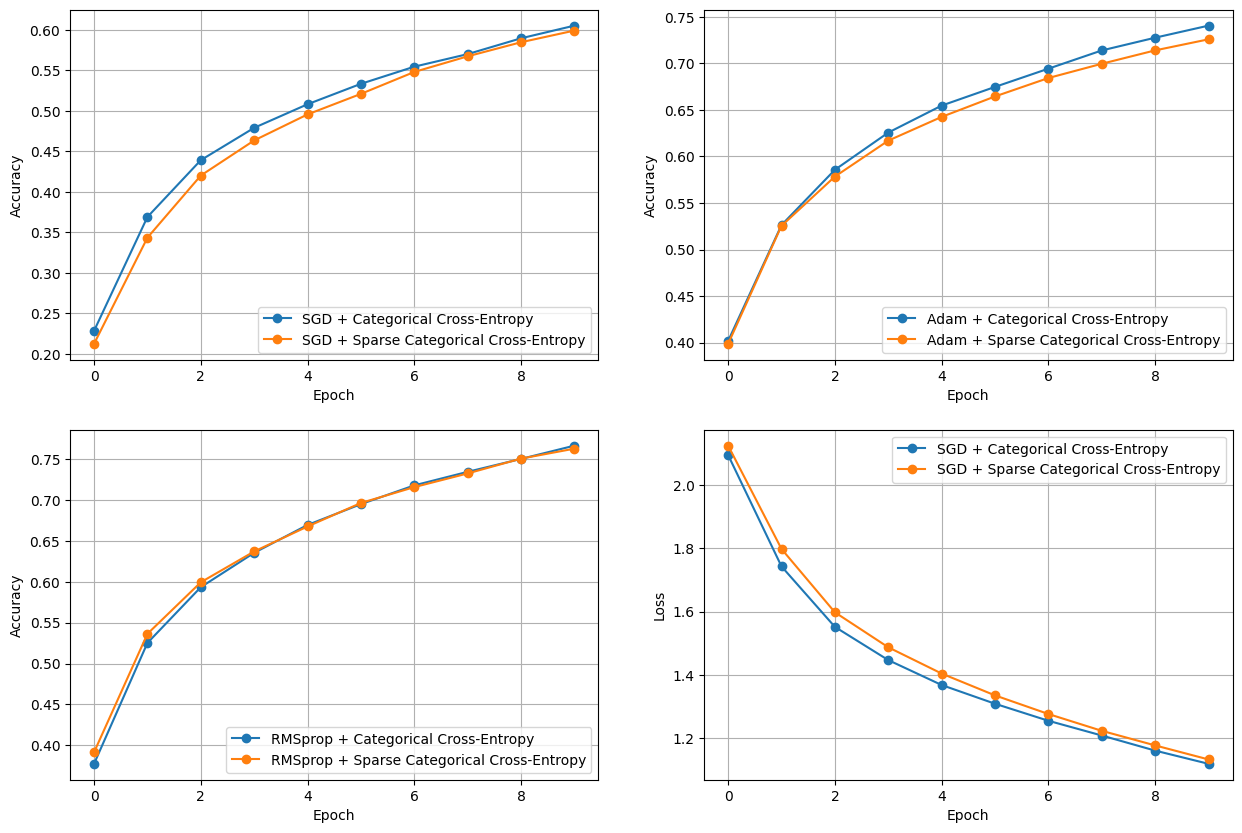

In [11]:
# Ploting the training history for each model
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(history_sgd_categorical.history['accuracy'], 'o-', label='SGD + Categorical Cross-Entropy')
plt.plot(history_sgd_sparse_categorical.history['accuracy'], 'o-', label='SGD + Sparse Categorical Cross-Entropy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
plt.plot(history_adam_categorical.history['accuracy'], 'o-', label='Adam + Categorical Cross-Entropy')
plt.plot(history_adam_sparse_categorical.history['accuracy'], 'o-', label='Adam + Sparse Categorical Cross-Entropy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(2, 2, 3)
plt.plot(history_rmsprop_categorical.history['accuracy'], 'o-', label='RMSprop + Categorical Cross-Entropy')
plt.plot(history_rmsprop_sparse_categorical.history['accuracy'], 'o-', label='RMSprop + Sparse Categorical Cross-Entropy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(2, 2, 4)
plt.plot(history_sgd_categorical.history['loss'], 'o-', label='SGD + Categorical Cross-Entropy')
plt.plot(history_sgd_sparse_categorical.history['loss'], 'o-', label='SGD + Sparse Categorical Cross-Entropy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

313/313 [==============================] - 6s 18ms/step


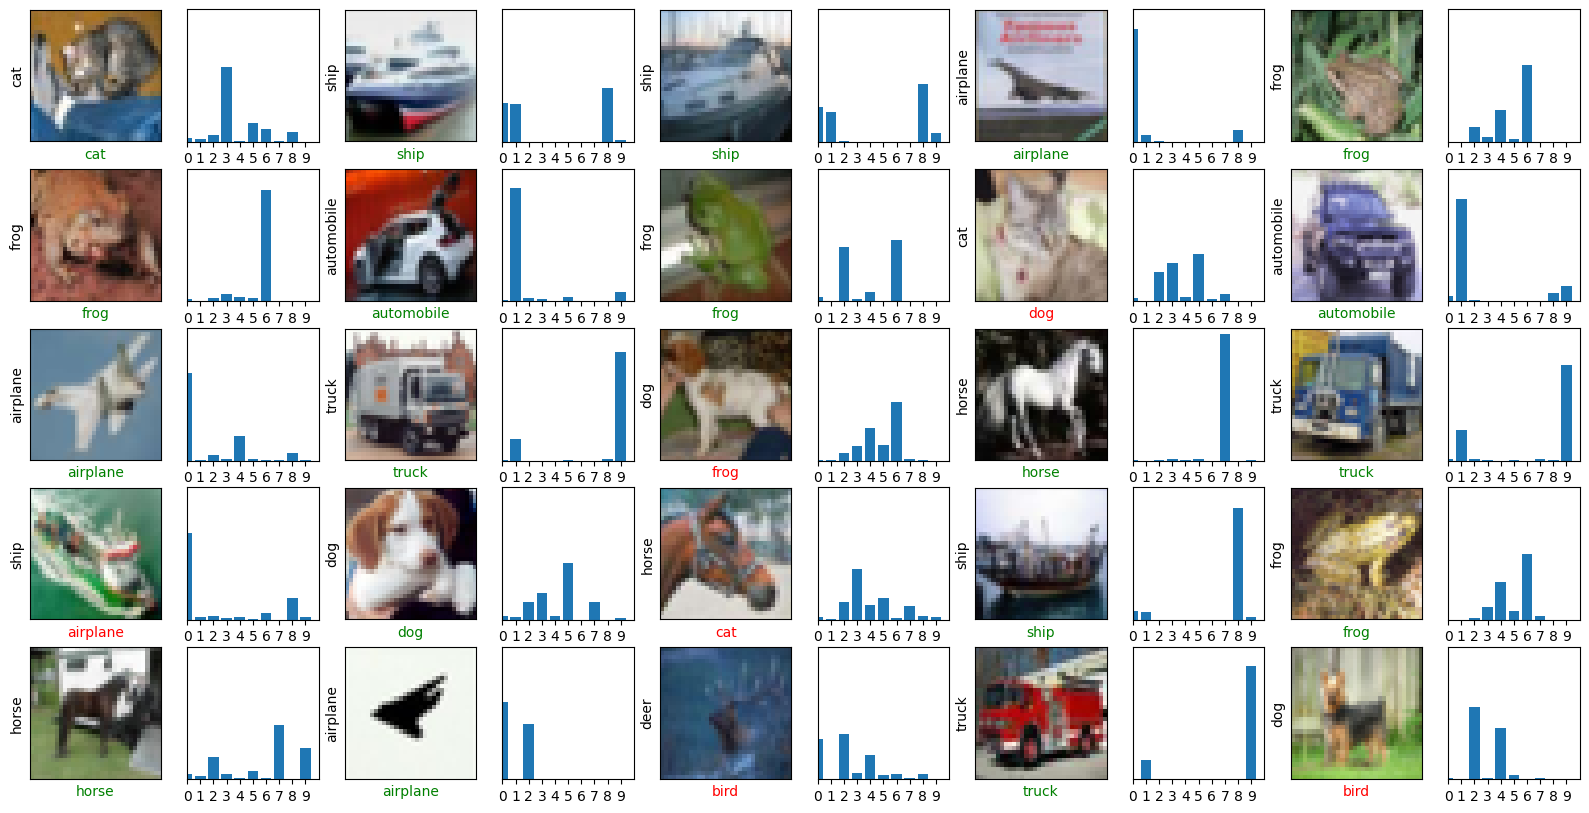

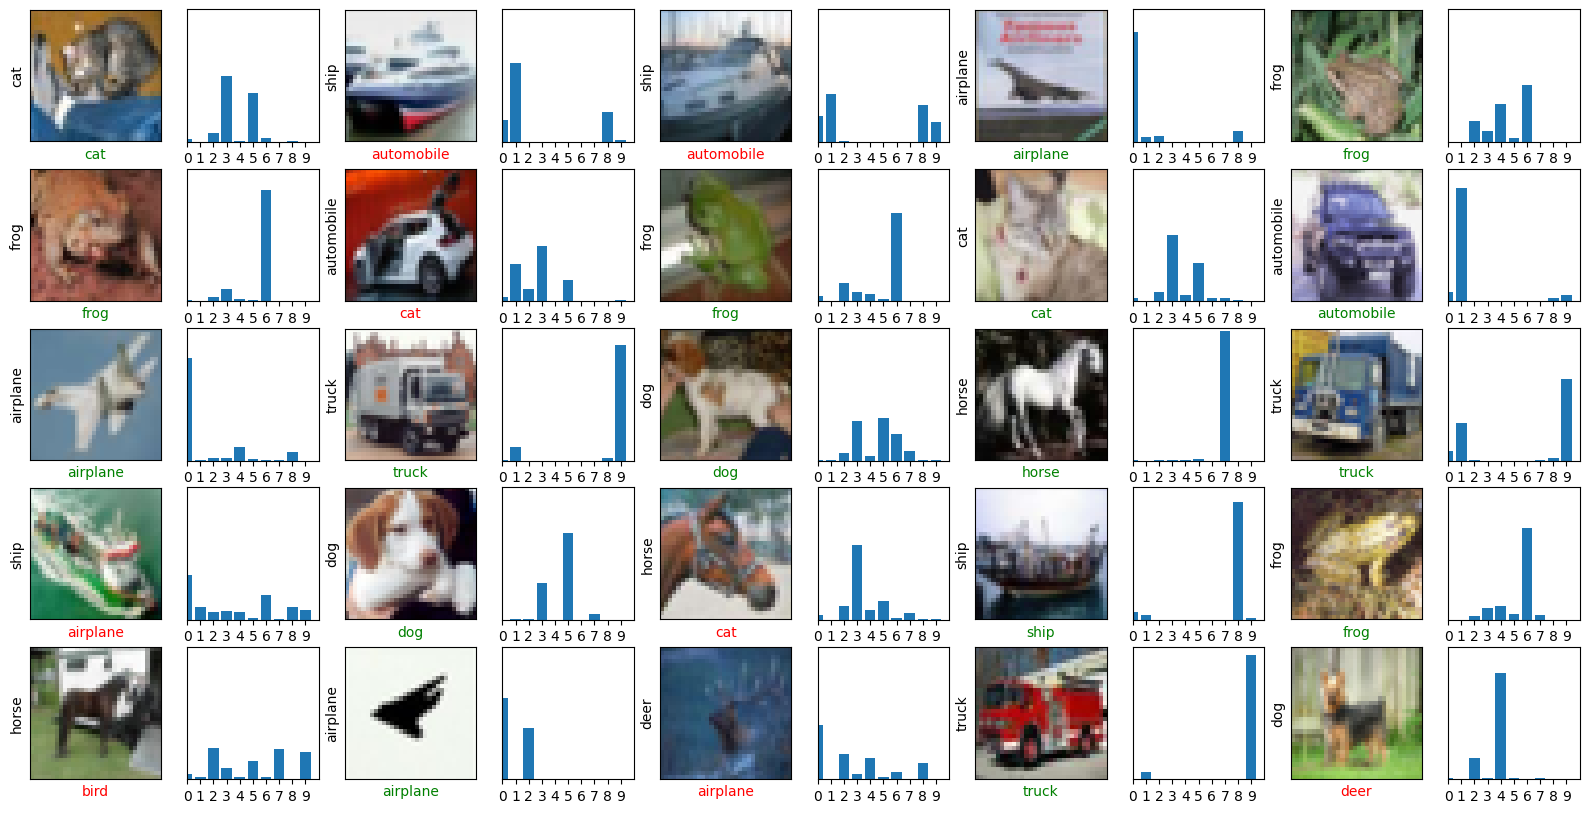

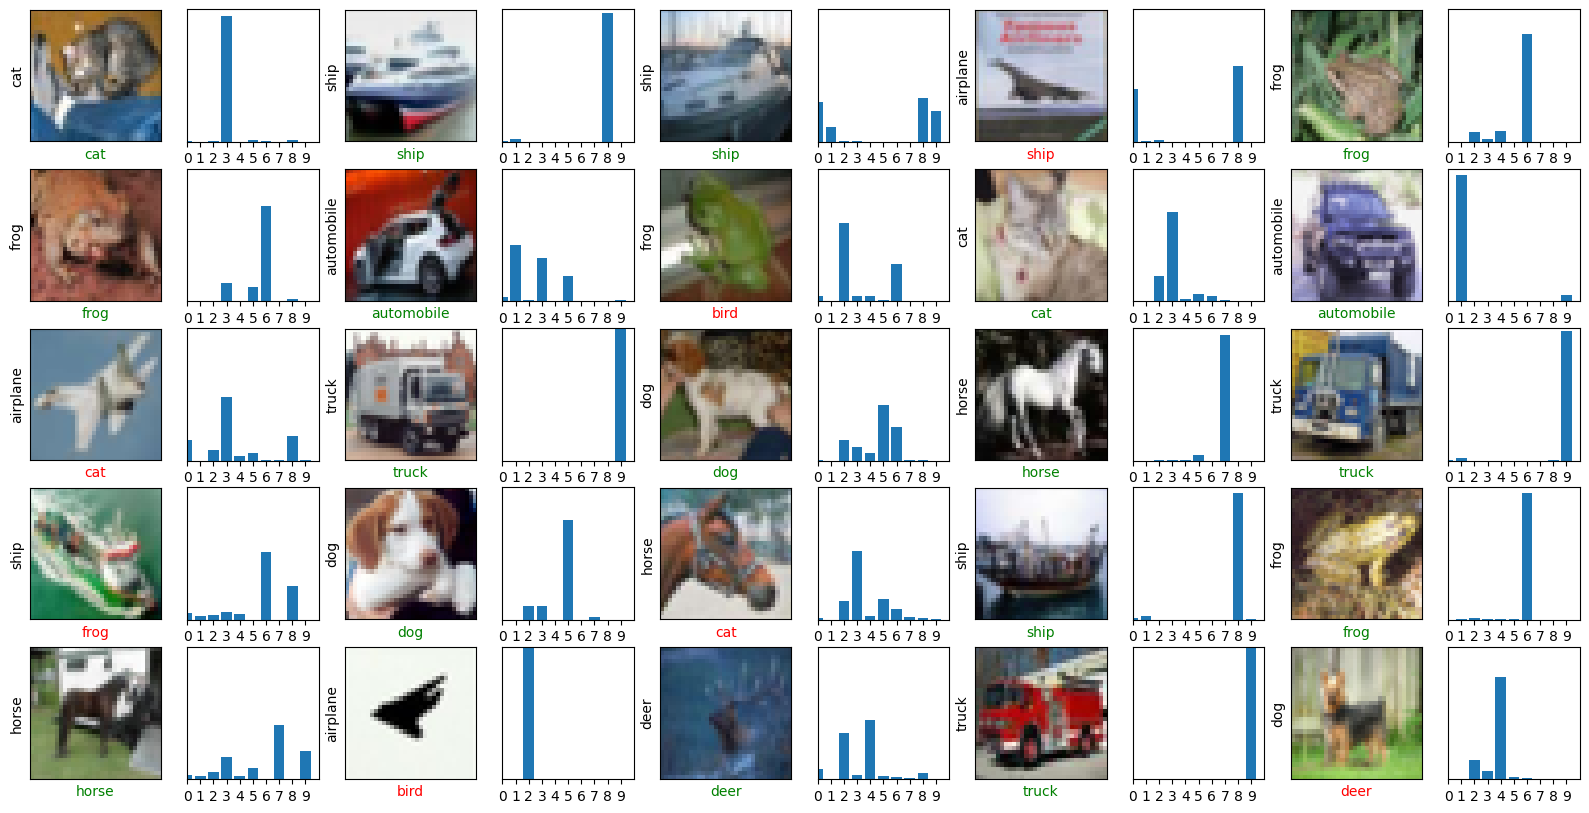

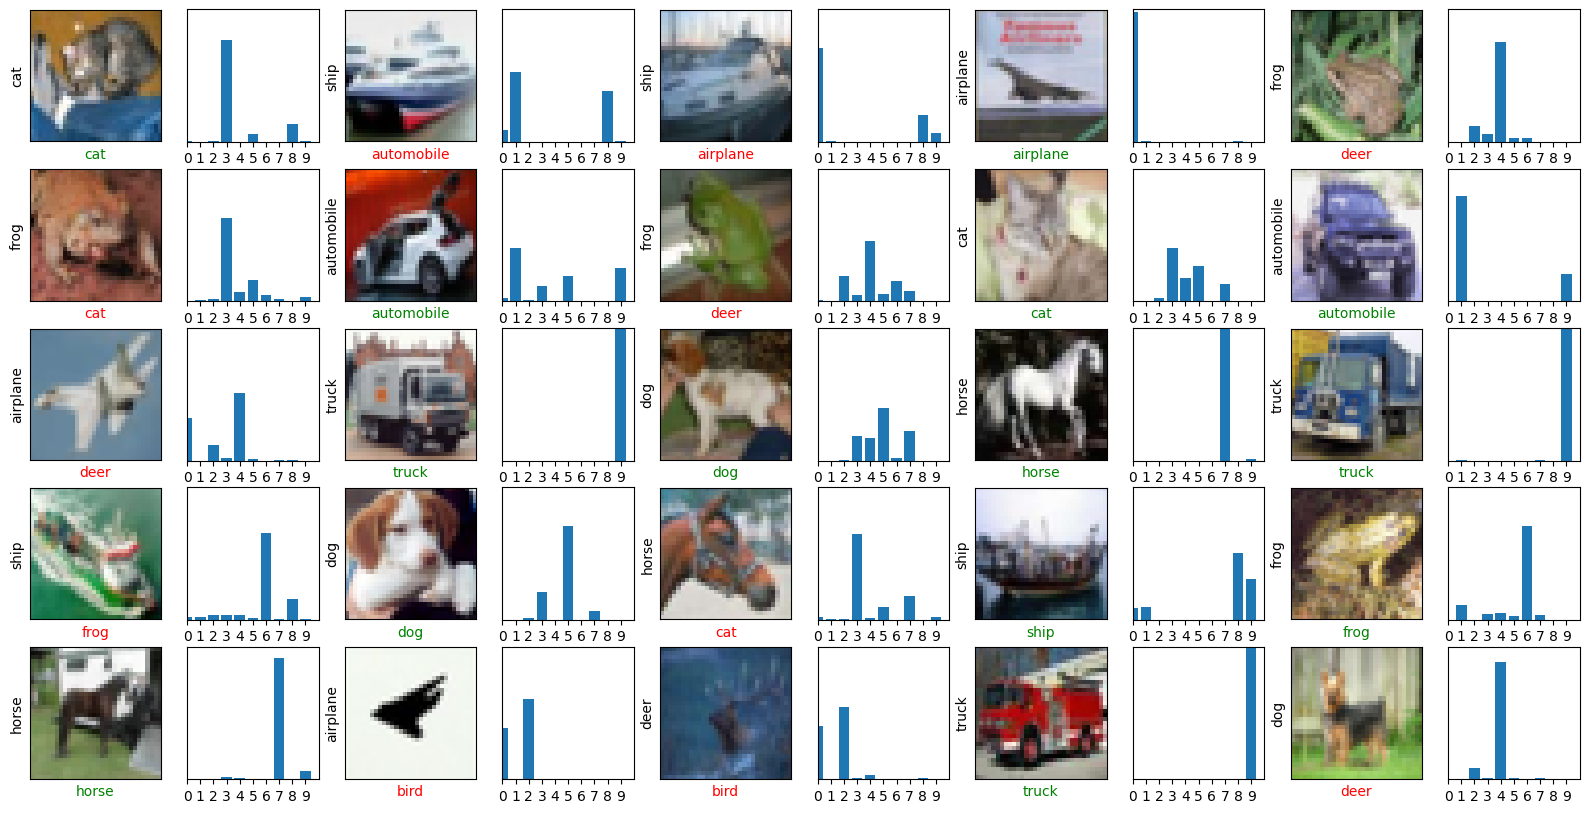

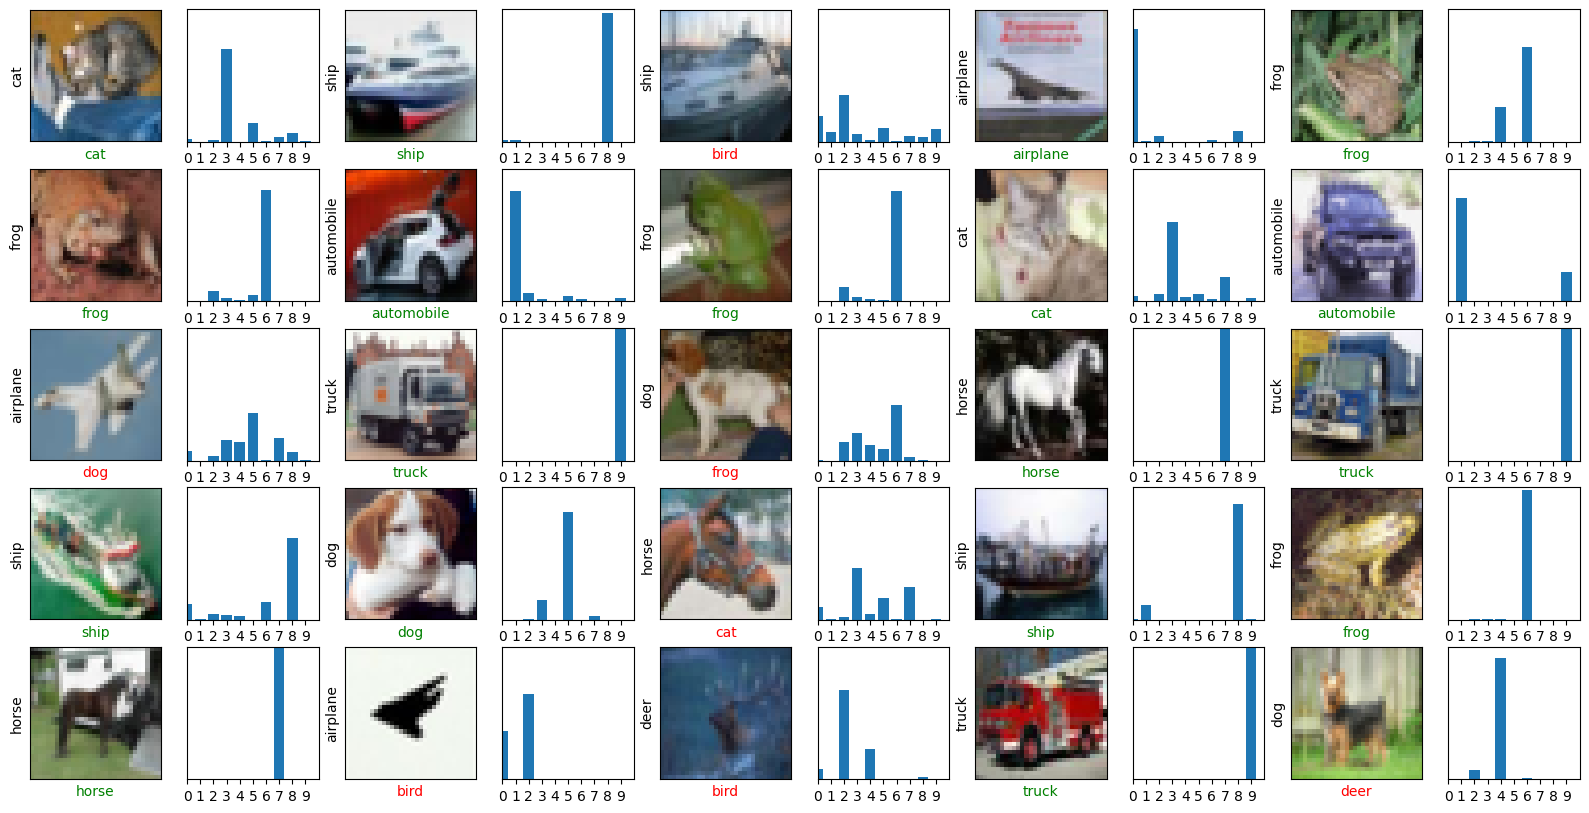

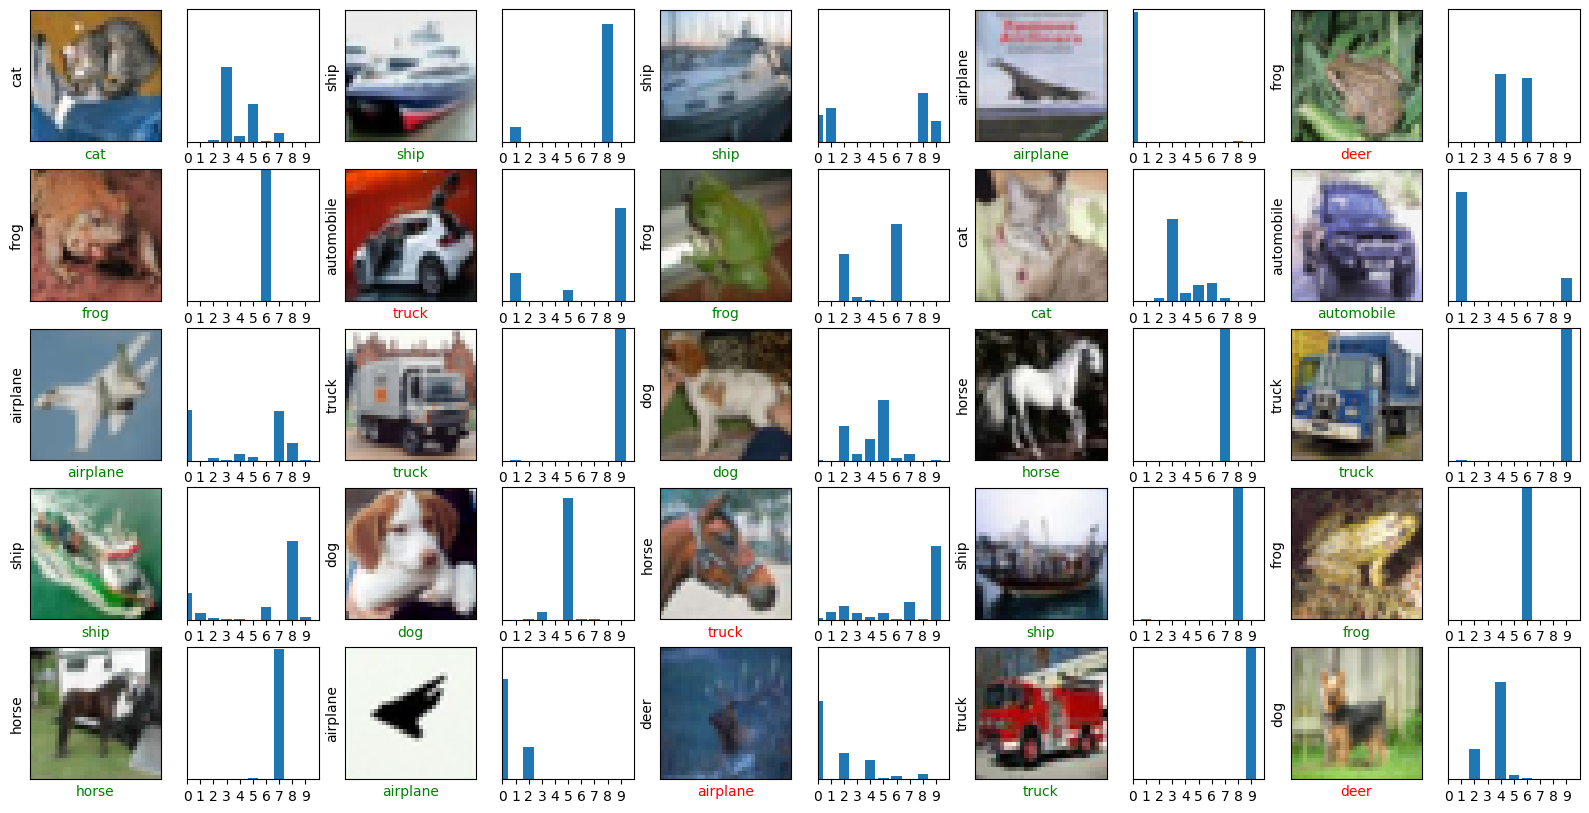

In [12]:
# Function to plot images and predictions
def plot_images_with_predictions(images, true_labels, predictions, class_names, rows=5, cols=5):
    plt.figure(figsize=(20, 2 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, 2 * cols, 2 * i + 1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.ylabel(class_names[true_labels[i][0]])
        if true_labels[i][0] == np.argmax(predictions[i]):
            plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
        else:
            plt.xlabel(class_names[np.argmax(predictions[i])], color='r')

        plt.subplot(rows, 2 * cols, 2 * i + 2)
        plt.bar(range(10), predictions[i])
        plt.yticks([])
        plt.xticks(range(0, 10))
        plt.ylim([0, 1])
        plt.xlim([0, 10])

# Ploting images and predictions for SGD + Categorical Cross-Entropy
predictions_sgd_categorical = model_sgd_categorical.predict(X_test)
plot_images_with_predictions(X_test, Y_test, predictions_sgd_categorical, class_names)

# Ploting images and predictions for SGD + Sparse Categorical Cross-Entropy
predictions_sgd_sparse_categorical = model_sgd_sparse_categorical.predict(X_test)
plot_images_with_predictions(X_test, Y_test, predictions_sgd_sparse_categorical, class_names)

# Ploting images and predictions for Adam + Categorical Cross-Entropy
predictions_adam_categorical = model_adam_categorical.predict(X_test)
plot_images_with_predictions(X_test, Y_test, predictions_adam_categorical, class_names)

# Ploting images and predictions for Adam + Sparse Categorical Cross-Entropy
predictions_adam_sparse_categorical = model_adam_sparse_categorical.predict(X_test)
plot_images_with_predictions(X_test, Y_test, predictions_adam_sparse_categorical, class_names)

# Ploting images and predictions for RMSprop + Categorical Cross-Entropy
predictions_rmsprop_categorical = model_rmsprop_categorical.predict(X_test)
plot_images_with_predictions(X_test, Y_test, predictions_rmsprop_categorical, class_names)

# Ploting images and predictions for RMSprop + Sparse Categorical Cross-Entropy
predictions_rmsprop_sparse_categorical = model_rmsprop_sparse_categorical.predict(X_test)
plot_images_with_predictions(X_test, Y_test, predictions_rmsprop_sparse_categorical, class_names)

plt.show()
